In [13]:
import os,sys
Nthread = 4
os.environ["OMP_NUM_THREADS"] = str(Nthread) # export OMP_NUM_THREADS=1
os.environ["OPENBLAS_NUM_THREADS"] = str(Nthread) # export OPENBLAS_NUM_THREADS=1
os.environ["MKL_NUM_THREADS"] = str(Nthread) # export MKL_NUM_THREADS=1
os.environ["VECLIB_MAXIMUM_THREADS"] = str(Nthread) # export VECLIB_MAXIMUM_THREADS=1
os.environ["NUMEXPR_NUM_THREADS"] = str(Nthread) # export NUMEXPR_NUM_THREADS=1

import autograd.numpy as np
from autograd import grad
import nlopt, numpy as npf
import matplotlib.pyplot as plt

rpath = '/Users/weiliang/Documents/rcw_grad'
sys.path.append(rpath)
sys.path.append("../") 

import use_autograd
use_autograd.use = 1
import rcwa

In [14]:
nG = 101 # truncation order, the actual truncation order might differ from this
# frequency and angles
freq = 1.
theta = 0.
phi = 0.
# lattice vector
Lx = .5
Ly = .5
L1 = [Lx,0.]
L2 = [0.,Ly]

# now consider 4 layers: vacuum + patterned + patterned + vacuum
epsuniform0 = 1. # dielectric for layer 1 (uniform)
epsuniformN = 1.  # dielectric for layer N (uniform)

thick0 = 1. # thickness for vacuum layer 1
thickN = 1.  # thickness for vacuum layer N

###########.  patterned for optimization
# all patterned layers below have the same griding structure: Nx*Ny
Nx = 100
Ny = 100
Nlayer = 2  # number of patterned layers for optimization
ndof = Nx*Ny*Nlayer # total number of DOFs

# thickness
thickness = [0.5,0.5]
epsbkg = [1., 1.]
epsdiff = [3.,5.]

In [15]:
ctrl = 0
vec = []
def fun_reflection(dof,Qabs):
    freqcmp = freq*(1+1j/2/Qabs)
    obj = rcwa.RCWA_obj(nG,L1,L2,freqcmp,theta,phi,verbose=0)
    # add all layers in order
    obj.Add_LayerUniform(thick0,epsuniform0)
    for i in range(Nlayer):
        obj.Add_LayerGrid(thickness[i],epsdiff[i],epsbkg[i],Nx,Ny)
    obj.Add_LayerUniform(thick0,epsuniformN)
    
    obj.Init_Setup(Gmethod=0)

    p_amp = 1.
    p_phase = 0.
    s_amp = 0.
    s_phase = 0.
    obj.MakeExcitationPlanewave(p_amp,p_phase,s_amp,s_phase,order = 0)
    obj.GridLayer_getDOF(dof)
    R,_ = obj.RT_Solve(normalize=1)


    if 'autograd' not in str(type(R)):
        global ctrl
        global vec
        vec = npf.copy(dof)
        
        print(ctrl,R)
        if npf.mod(ctrl,10)==0:
            for i in range(Nlayer):
                plt.figure();
                plt.imshow(np.reshape(dof[i*Nx*Ny:(i+1)*Nx*Ny],(Nx,Ny)))
                plt.colorbar()
                plt.show()
            
        ctrl +=1
    return R

0 0.08316398138852411


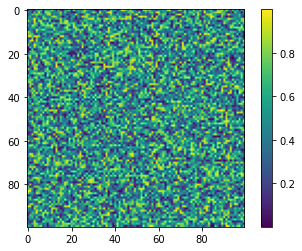

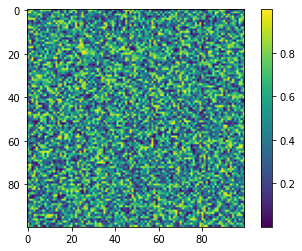

1 0.08316694385932892
2 0.08319654907266635
3 0.08361928439173699
4 0.08908726324679736
5 0.11558943716343614
6 0.08591848534883462
7 0.12529148260055534
8 0.12363008574409445
9 0.1271340009172664
10 0.12603366283057715


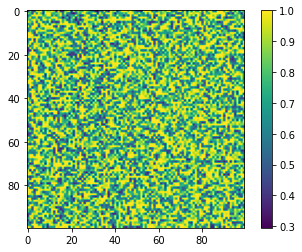

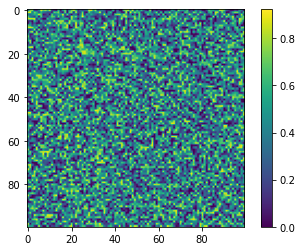

11 0.12725801218245322
12 0.11435291837303593
13 0.12717971895209904
14 0.12727810060099146
15 0.12739021780047907
16 0.1073973223627347
17 0.12722238558983442
18 0.12747442937873263
19 0.1261768499698819
20 0.1276493019655538


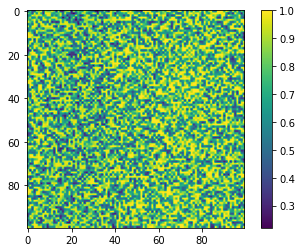

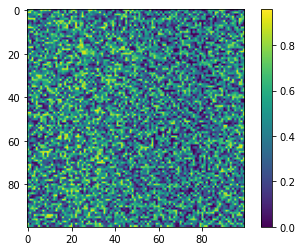

21 0.10321839938472217
22 0.12762482140882717
23 0.12801206448330907
24 0.12832424380552424
25 0.10182189573590626
26 0.13643861464575166
27 0.15703427817670115
28 0.1492240834616319
29 0.16550591536572157
30 0.17347930764892866


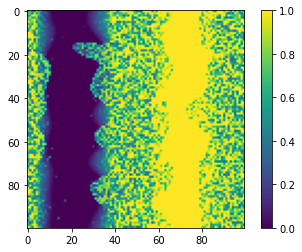

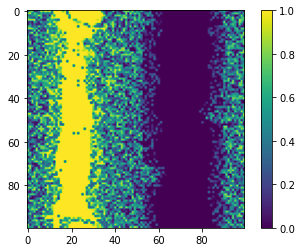

31 0.17743574667562076
32 0.185789097631382
33 0.08317131389416725
34 0.18144169027484547
35 0.18772946296295773
36 0.1918301070150056
37 0.18808267726758252
38 0.19533292702906568
39 0.20322383014301773
40 0.17245864703676703


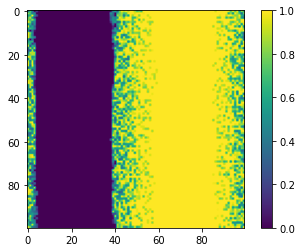

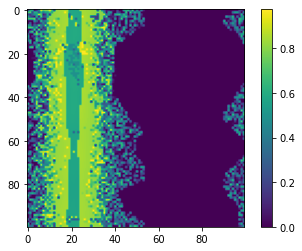

41 0.20432540471985813
42 0.20575598334413917
43 0.20633016212589103
44 0.20936773646355752
45 0.2130423662624396
46 0.2156211873111063
47 0.2173488271312677
48 0.21817156037407104
49 0.2186802945426244
50 0.21900539773402414


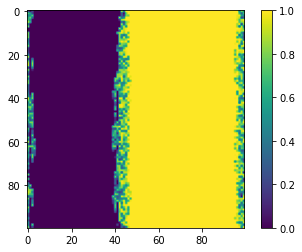

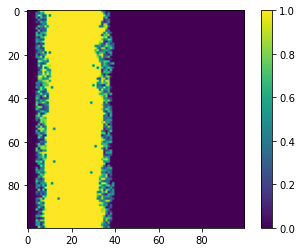

51 0.21929769436347096
52 0.21963678373061882
53 0.22001873793793694
54 0.2204050762703473
55 0.2207274687804505
56 0.22088551817842136
57 0.220981671157455
58 0.22105052636839842
59 0.22111478685166536
60 0.2211709338419116


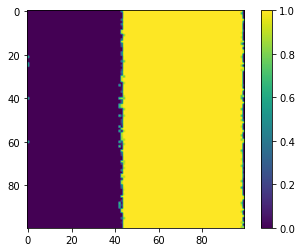

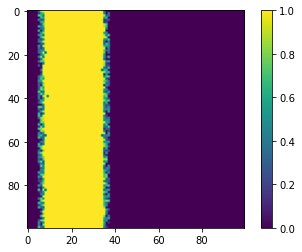

61 0.22121913560302553
62 0.22126563071907582
63 0.22132004614222708
64 0.2213827827327534
65 0.22144918759379728
66 0.221507750007645
67 0.2215393283119075
68 0.22155558690834048
69 0.22156618490391913
70 0.2215777880801196


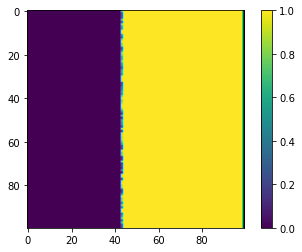

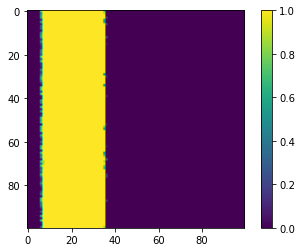

71 0.2215853561729929
72 0.22158742320483668
73 0.2215886537666259
74 0.22158876301867989
75 0.22158879226464367
76 0.22158881940537428
77 0.22158884605643817
78 0.22158886993203036
79 0.22158888853222045
80 0.22158889981279276


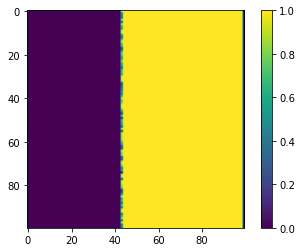

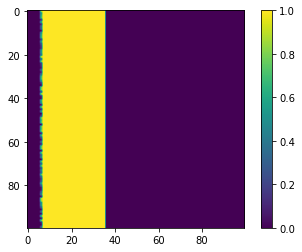

81 0.2215888905496404
82 0.22158890465801276
83 0.2215889123761328
84 0.22158891216592605
85 0.22158891520240462
86 0.22158891629648386
87 0.22158891342072867
88 0.22158892067130845
89 0.2215889224106096
90 0.2215889162334904


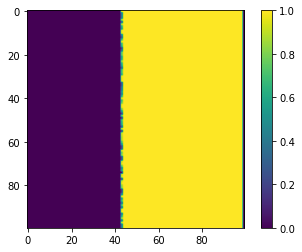

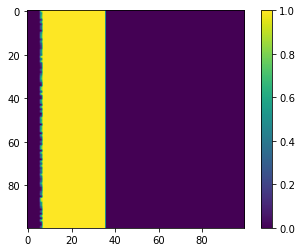

91 0.2215889227523502
92 0.22158892367200841
93 0.22158892402257638
94 0.22158892136354366
95 0.22158892430283747
96 0.221588924601151
97 0.22158892473229663
98 0.22158892402159203
99 0.22158892474447434


In [16]:
Qabs = 20.
fun = lambda dof: fun_reflection(dof,Qabs)
grad_fun = grad(fun)
def fun_nlopt(dof,gradn):
    gradn[:] = grad_fun(dof)
    return fun(dof)

init = np.random.random(ndof)
lb=np.zeros(ndof,dtype=float)
ub=np.ones(ndof,dtype=float)

opt = nlopt.opt(nlopt.LD_MMA, ndof)
opt.set_lower_bounds(lb)
opt.set_upper_bounds(ub)

opt.set_xtol_rel(1e-5)
opt.set_maxeval(100)

opt.set_max_objective(fun_nlopt)
x = opt.optimize(init)